In [1]:
import os
import glob
import numpy as np
import h5py
import cv2
from skimage import io
import matplotlib.pyplot as plt

In [2]:
addresses = glob.glob(os.getcwd()+"/Data1/*.TIF")
addresses = list(addresses)

addresses.sort()

In [3]:
data_dict = {}

for i in range(len(addresses)):
        data_dict['B'+str(i+1)] = io.imread(addresses[i],as_gray = True)


In [4]:
#Calculate NDVI of scene
ndvi = (data_dict['B3']-data_dict['B4'])/(data_dict['B3']+data_dict['B4']+.0000001)

In [5]:
ndvi_mask = np.zeros(ndvi.shape)
threshold = 0.8

#Any faster way to do this? Yes
'''for i in range(ndvi.shape[0]):
        for j in range(ndvi.shape[1]):
                if (ndvi[i][j] >= threshold):
                        ndvi_mask[i][j] = 1'''
ndvi_mask[ndvi>=threshold]=1

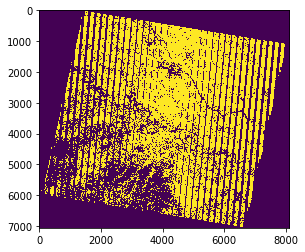

In [6]:
plt.imshow(ndvi_mask)
plt.show()

In [7]:
for key in data_dict:
    #data_dict[key][ndvi<threshold]=0
    data_dict[key] = np.multiply(ndvi_mask.astype(float),data_dict[key])

ValueError: operands could not be broadcast together with shapes (7061,8121) (14121,16241) 

In [8]:
for key in data_dict:
    print(data_dict[key].shape)

(7061, 8121)
(7061, 8121)
(7061, 8121)
(7061, 8121)
(7061, 8121)
(7061, 8121)
(7061, 8121)
(14121, 16241)
(7061, 8121)


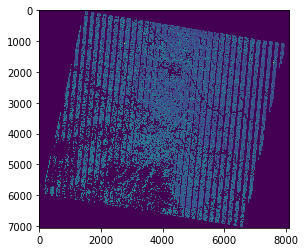

In [9]:
plt.imshow(data_dict['B3'])
plt.show()

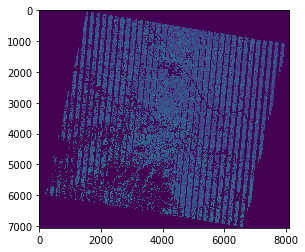

In [10]:
plt.imshow(data_dict['B5'])
plt.show()

(7061, 8121, 3)


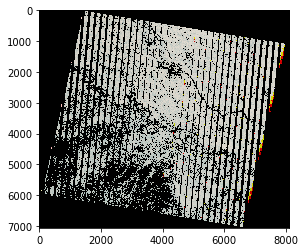

In [12]:
np.reshape(data_dict['B1'],(data_dict['B1'].shape[0],data_dict['B1'].shape[1],1) )
np.reshape(data_dict['B2'],(data_dict['B2'].shape[0],data_dict['B2'].shape[1],1) )
np.reshape(data_dict['B3'],(data_dict['B3'].shape[0],data_dict['B3'].shape[1],1) )

rgb = np.dstack((data_dict['B3'],data_dict['B2'],data_dict['B1']))
print(rgb.shape)

plt.imshow(rgb)
plt.show()

In [13]:
np.save('rgb',rgb)